# Solutions to Loaded String Coupled Oscillator Problem

Using a few approximations, a loaded string with evenly spaced masses connected by strings with fixed tensions exhibits behavior akin to coupled harmonic oscillators. We can find the normal modes of the system (which are eigenfunctions that arise from the equations of motion), which span the space of solutions for the equations of motion of the system. From these equations of motion, as the number of masses approaches infinity, the system is described by waves. In a sense, these are analogous to solution of a "discrete" wave equation(s).

Here, we provided code for a visual animation of the normal modes of an arbitrary loaded string system.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.linalg import eigh_tridiagonal

In [2]:
from matplotlib import rc
rc('animation', html='jshtml')

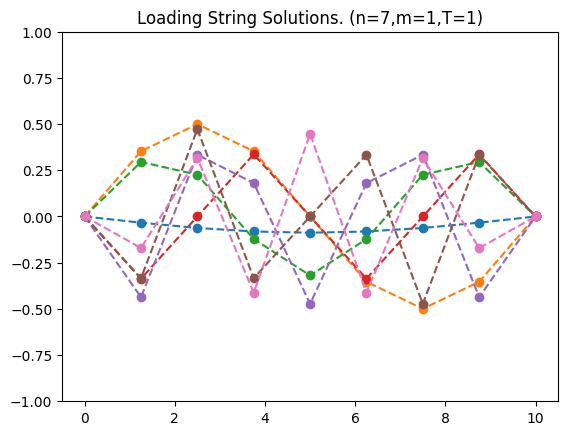

In [51]:
# Loaded String of N Masses
n = 7
m = 1# per loaded mass
T = 1 # tension on string

l = 10 # total length of string
interval = 30
speed = 2 # times fast

w_0 = T*n/(m*l)
d = 2*w_0*np.ones(n)
e = -1*w_0*np.ones(n-1)
evals,evects = eigh_tridiagonal(d,e)

w = np.sqrt(evals) #frequencies, one per normal mode
a = evects.T #amplitudes, n per normal mode, of the n variables respectively

# get current position for normal mode i, at time t, assuming all phases at zero (aka a cosine function)
def current_state(i,t):
  return a[i]*np.cos(w[i]*t)

# add zeroes to beginning and end
def add_zeros(arr):
  return np.append(np.insert(arr,0,0),0)

x = np.linspace(0,l,n+2)
plt.ylim(-1,1)
plt.title("Loading String Solutions. (n={},m={},T={})".format(n,m,T))
ax = plt.gca()

y = np.array([add_zeros(current_state(i,0)) for i in range(n)]).T #transpose, since y vals on column for ax.plot
lns = ax.plot(x,y,"o--")


def animate(t):
  for i in range(n):
    y_vals = add_zeros(current_state(i,t*2*interval/200)) # for the ith normal mode, at time t
    lns[i].set_data(x,y_vals)
  return lns

ani = FuncAnimation(plt.gcf(),animate,frames=int(4*np.pi*400/(interval*2)),interval=interval,blit=True)
ani

In [29]:
# for writing files to gifs
# writer = PillowWriter(fps=960)
# ani.save(r"./path.gif".format(exampleNum),writer=writer);